In [5]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt

Quick overview of the dataset :
Accelerometer and Gyroscope readings are taken from 30 volunteers(referred as subjects) while performing the following 6 Activities.

Walking
WalkingUpstairs
WalkingDownstairs
Standing
Sitting
Lying.
Readings are divided into a window of 2.56 seconds with 50% overlapping.

Accelerometer readings are divided into gravity acceleration and body acceleration readings, which has x,y and z components each.

Gyroscope readings are the measure of angular velocities which has x,y and z components.

Jerk signals are calculated for BodyAcceleration readings.

Fourier Transforms are made on the above time readings to obtain frequency readings.

Now, on all the base signal readings., mean, max, mad, sma, arcoefficient, engerybands,entropy etc., are calculated for each window.

We get a feature vector of 561 features and these features are given in the dataset.

Each window of readings is a datapoint of 561 features.

Problem Statement :
Given a new datapoint we have to predict the Activity

Read the datasets into train and test dataframe respectively

In [6]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

Data Cleaning:
    Check For Duplicates

In [7]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


Checking for NaN/null values

In [8]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


Check for data imbalance

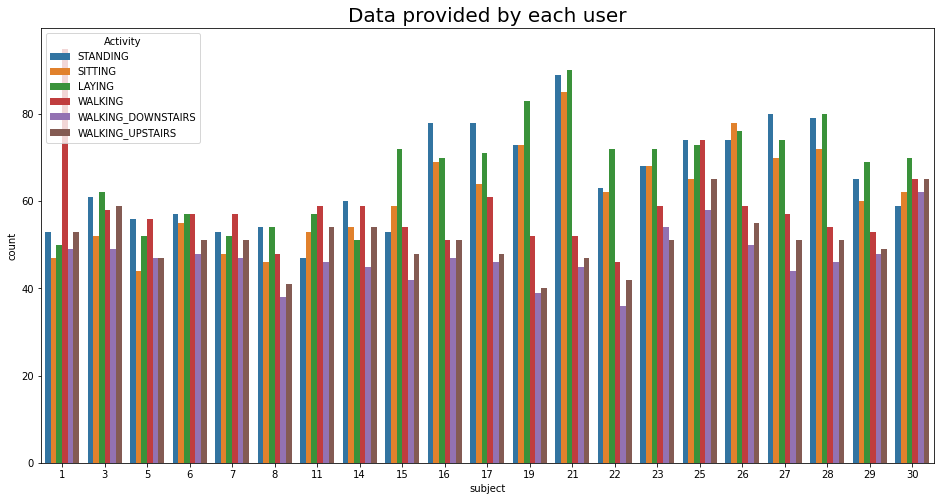

In [9]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='Activity', data = train)
plt.show()

As we can see We have got almost same number of reading from all the subjects means there are not significant difference in reading then we should not worry about it

Magnitude of an acceleration, can separate the activities

In [10]:
train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

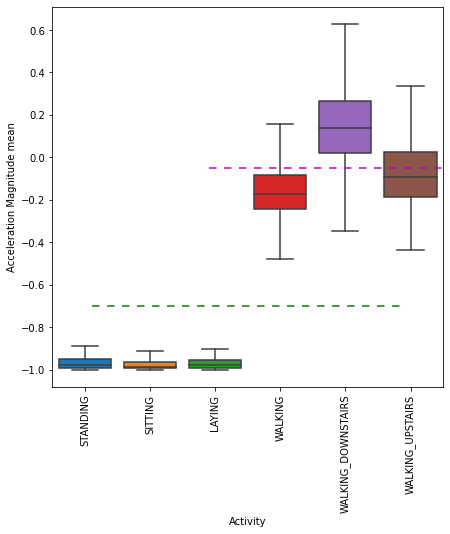

In [11]:
plt.figure(figsize=(7,7))

sns.boxplot(x='Activity', y='tBodyAccMag-mean()',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

Observations:

If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
If tAccMean > 0.0 then the Activity is WalkingDownstairs.
We can classify 75% the Acitivity labels with some errors.

Position of GravityAccelerationComponants also matters

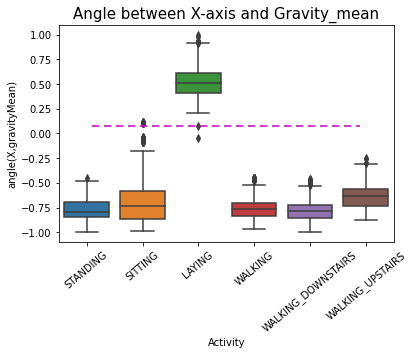

In [12]:
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

Observations:

If angleX,gravityMean > 0 then Activity is Laying.
We can classify all datapoints belonging to Laying activity with just a single if else statement.

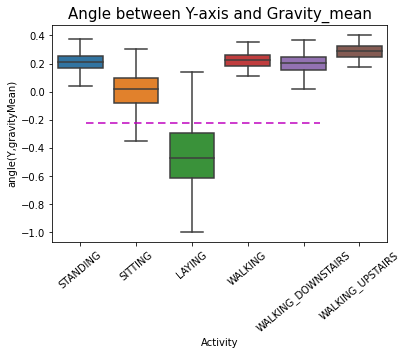

In [13]:
sns.boxplot(x='Activity', y='angle(Y,gravityMean)', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

In [14]:
from sklearn.manifold import TSNE
def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')


performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.003s...
[t-SNE] Computed neighbors for 7352 samples in 1.382s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] Computed conditional probabilities in 0.035s
[t-SNE] Iteration 50: error = 113.9997711, gradient norm = 0.0233462 (50 iterations in 1.535s)
[t-SNE] Iteration 100: error = 98.3199539, gradient norm = 0.0168576 (50 iterations in 

/Users/umarala/opt/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


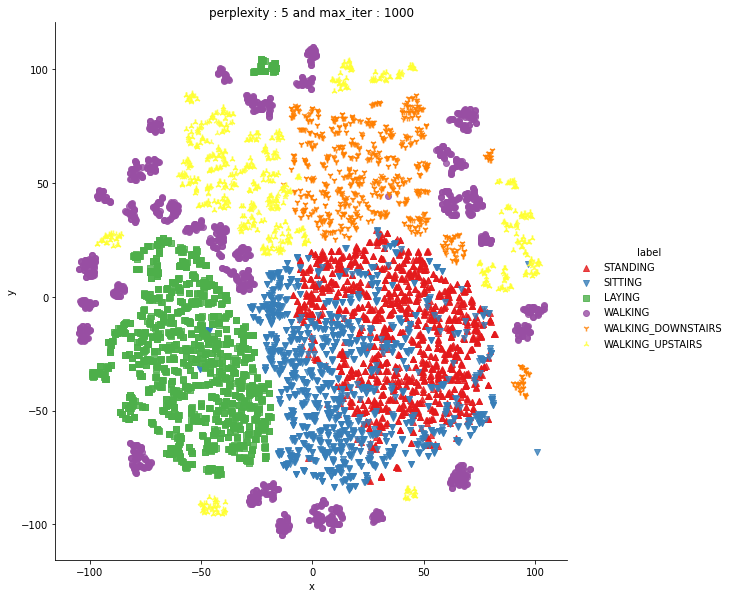

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.003s...
[t-SNE] Computed neighbors for 7352 samples in 0.995s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133828
[t-SNE] Computed conditional probabilities in 0.060s
[t-SNE] Iteration 50: error = 105.9356537, gradient norm = 0.0174591 (50 iterations in 1.308s)
[t-SNE] Iteration 100: error = 90.3439026, gradient norm = 0.0109822 (50 iteratio

/Users/umarala/opt/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


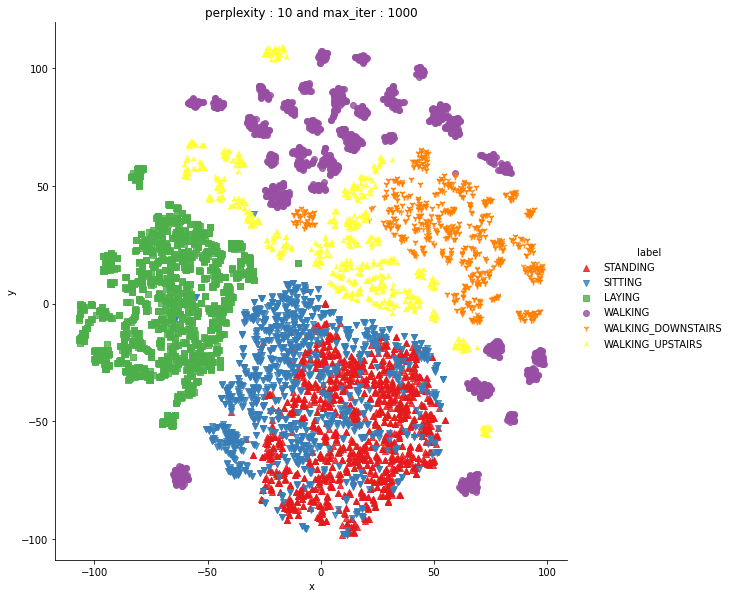

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.002s...
[t-SNE] Computed neighbors for 7352 samples in 1.031s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Computed conditional probabilities in 0.121s
[t-SNE] Iteration 50: error = 97.7669983, gradient norm = 0.0151493 (50 iterations in 1.447s)
[t-SNE] Iteration 100: error = 84.0849686, gradient norm = 0.0082205 (50 iteration

/Users/umarala/opt/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


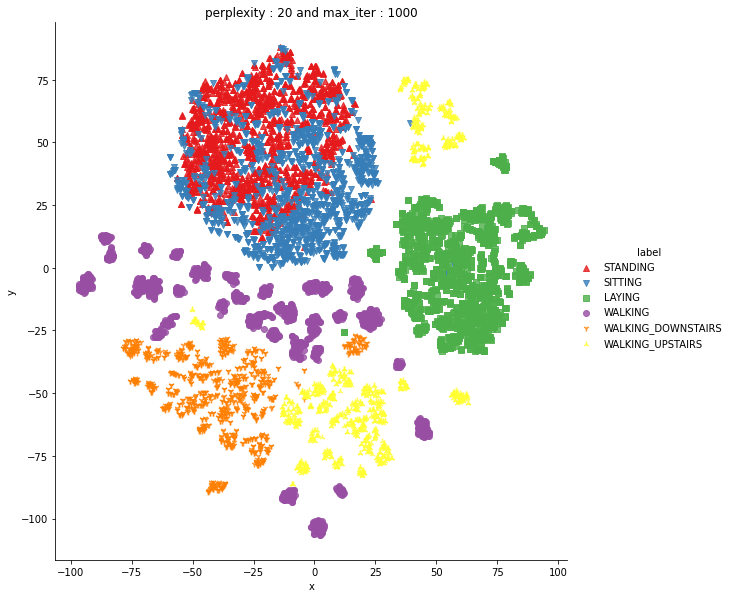

Done


In [15]:
X_pre_tsne = train.drop(['subject', 'Activity'], axis=1)
y_pre_tsne = train['Activity']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[5,10,20])

Conclusion
-->As we can see all the features except standing and sitting can be seperated very easily

--> Model will probably be confused between standing and sitting

In [16]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [17]:
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


Determine unique activities and the counts. Here we see Walking Downstairs and Upstairs we have less data

In [18]:
print(train.Activity.unique())
print("----------------------------------------")
print(train.Activity.value_counts())

['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']
----------------------------------------
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64


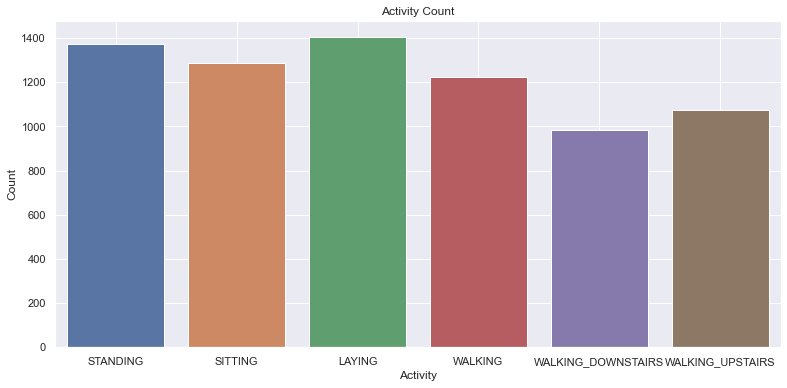

In [19]:
sns.set(rc={'figure.figsize':(13,6)})
fig = sns.countplot(x = "Activity" , data = train)
plt.xlabel("Activity")
plt.ylabel("Count")
plt.title("Activity Count")
plt.grid(True)
plt.show(fig)

In [20]:
pd.crosstab(train.subject, train.Activity, margins=True).style.background_gradient(cmap='autumn_r')

Activity,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS,All
subject,,,,,,,
1,50,47,53,95,49,53,347
3,62,52,61,58,49,59,341
5,52,44,56,56,47,47,302
6,57,55,57,57,48,51,325
7,52,48,53,57,47,51,308
8,54,46,54,48,38,41,281
11,57,53,47,59,46,54,316
14,51,54,60,59,45,54,323
15,72,59,53,54,42,48,328


In [21]:
print(train.shape , test.shape)

(7352, 563) (2947, 563)


In [22]:
train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

Pre-processing and data preparation to feed data into Deep Neural Network.

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train.iloc[:,0:562])
mat_train = scaler.transform(train.iloc[:,0:562])
print(mat_train)

[[0.64429225 0.48985291 0.43354743 ... 0.79825103 0.47068654 0.        ]
 [0.63920942 0.49179472 0.4382399  ... 0.79848665 0.47284164 0.        ]
 [0.63982653 0.49026642 0.44326915 ... 0.79872236 0.47544109 0.        ]
 ...
 [0.63669369 0.49149469 0.47748909 ... 0.84506893 0.52040559 1.        ]
 [0.64482708 0.49057848 0.42085971 ... 0.84323381 0.51266974 1.        ]
 [0.67575173 0.49378844 0.39806642 ... 0.84348837 0.51834742 1.        ]]


In [24]:
scaler = MinMaxScaler()
scaler.fit(test.iloc[:,0:562])
mat_test = scaler.transform(test.iloc[:,0:562])
print(mat_test)

[[0.6718788  0.55764282 0.52464834 ... 0.62209457 0.46362736 0.        ]
 [0.69470427 0.57426358 0.42707858 ... 0.62446791 0.45014396 0.        ]
 [0.68636345 0.55310221 0.42794829 ... 0.62380956 0.45251181 0.        ]
 ...
 [0.74529355 0.64526771 0.43015674 ... 0.62088108 0.58803909 1.        ]
 [0.65638384 0.62620241 0.44817885 ... 0.61581385 0.59135763 1.        ]
 [0.58994885 0.56560474 0.41032069 ... 0.61537208 0.59163879 1.        ]]


In [25]:
temp = []
for i in train.Activity:
    if i == "WALKING": temp.append(0)
    if i == "WALKING_UPSTAIRS": temp.append(1)
    if i == "WALKING_DOWNSTAIRS": temp.append(2)
    if i == "SITTING": temp.append(3)
    if i == "STANDING": temp.append(4)
    if i == "LAYING": temp.append(5)
train["n_Activity"] = temp

In [26]:
temp = []
for i in test.Activity:
    if i == "WALKING": temp.append(0)
    if i == "WALKING_UPSTAIRS": temp.append(1)
    if i == "WALKING_DOWNSTAIRS": temp.append(2)
    if i == "SITTING": temp.append(3)
    if i == "STANDING": temp.append(4)
    if i == "LAYING": temp.append(5)
test["n_Activity"] = temp

In [27]:

train.drop(["Activity"] , axis = 1 , inplace = True)

In [28]:
test.drop(["Activity"] , axis = 1 , inplace = True)

In [29]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train.n_Activity , num_classes=6)
y_test = to_categorical(test.n_Activity , num_classes=6)

In [30]:
y_train

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

In [31]:
y_test

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

In [32]:
X_train = mat_train 
X_test = mat_test

In [33]:
print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)


(7352, 562) (7352, 6)
(2947, 562) (2947, 6)


In [34]:
filepath="HAR_weights.hdf5"
from tensorflow.keras.callbacks import ReduceLROnPlateau , ModelCheckpoint

lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, min_delta=0.0001, patience=5, verbose=1)

checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout , BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import RMSprop, Adam
#from tensorflow.keras.utils import np_utils


In [36]:

model = Sequential()

model.add(Dense(64, kernel_initializer='uniform', input_dim=X_train.shape[1] , activation='relu'))
model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
model.add(Dense(196, kernel_initializer='uniform', activation='relu'))
model.add(Dense(32, kernel_initializer='uniform', activation='relu'))
model.add(Dense(6, kernel_initializer='uniform', activation='sigmoid'))

#model.compile(optimizer = Adam(lr = 0.0005),loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=Adam(lr = 0.0005),loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                36032     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 196)               25284     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                6304      
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 1

/Users/umarala/opt/anaconda3/envs/py38/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [37]:
#history = model.fit(X_train, y_train , epochs=22 , batch_size = 256 , validation_data=(X_test, y_test))
history = model.fit(X_train, y_train , epochs=22 , batch_size = 256 , validation_data=(X_test, y_test) , callbacks=[checkpoint, lr_reduce])

Epoch 1/22
29/29 [==============================] - 1s 8ms/step - loss: 1.7272 - accuracy: 0.5061 - val_loss: 1.7151 - val_accuracy: 0.4164

Epoch 00001: val_accuracy improved from -inf to 0.41636, saving model to HAR_weights.hdf5
Epoch 2/22
29/29 [==============================] - 0s 3ms/step - loss: 1.1947 - accuracy: 0.4471 - val_loss: 1.3594 - val_accuracy: 0.4998

Epoch 00002: val_accuracy improved from 0.41636 to 0.49983, saving model to HAR_weights.hdf5
Epoch 3/22
29/29 [==============================] - 0s 3ms/step - loss: 0.7958 - accuracy: 0.5277 - val_loss: 1.1024 - val_accuracy: 0.5256

Epoch 00003: val_accuracy improved from 0.49983 to 0.52562, saving model to HAR_weights.hdf5
Epoch 4/22
29/29 [==============================] - 0s 3ms/step - loss: 0.6674 - accuracy: 0.5592 - val_loss: 0.9424 - val_accuracy: 0.5219

Epoch 00004: val_accuracy did not improve from 0.52562
Epoch 5/22
29/29 [==============================] - 0s 3ms/step - loss: 0.6040 - accuracy: 0.6092 - val_l

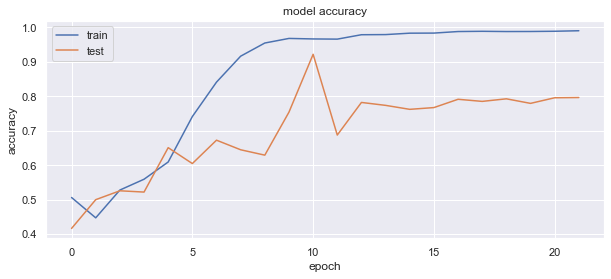

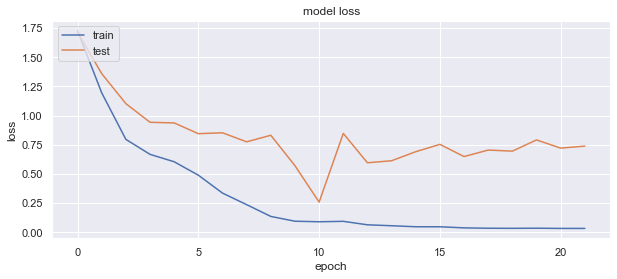

In [38]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 4
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
from sklearn.metrics import confusion_matrix
model.load_weights("HAR_weights.hdf5")
pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

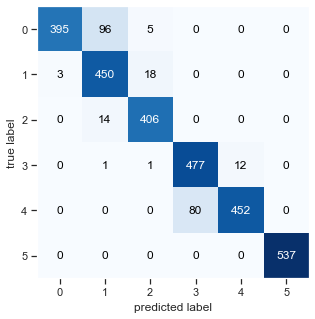

In [40]:
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(10, 5))
plt.show()

In [41]:
from sklearn.metrics import classification_report , accuracy_score
target_names = ['Walking', 'Walking Upstairs', 'Walking Downstairs', 'Sitting', 'Standing', 'Laying']
print(classification_report(y_true, pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      0.80      0.88       496
           1       0.80      0.96      0.87       471
           2       0.94      0.97      0.96       420
           3       0.86      0.97      0.91       491
           4       0.97      0.85      0.91       532
           5       1.00      1.00      1.00       537

    accuracy                           0.92      2947
   macro avg       0.93      0.92      0.92      2947
weighted avg       0.93      0.92      0.92      2947



In [42]:
d = { "Index":np.arange(2947) , "Activity":pred }
final = pd.DataFrame(d)
final.to_csv( 'human_activity_predictions.csv' , index = False)

#Use Rndom Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)

In [44]:
X_train.shape

(7352, 562)

In [47]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
yhat = model.predict(X_test)
yhat

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]], dtype=float32)

In [51]:
pred = np.argmax(yhat,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

In [52]:
from sklearn.metrics import classification_report



print(classification_report(y_true, pred, target_names=target_names))

                    precision    recall  f1-score   support

           Walking       0.66      0.77      0.71       496
  Walking Upstairs       0.95      0.51      0.66       471
Walking Downstairs       0.63      0.95      0.76       420
           Sitting       0.58      0.99      0.73       491
          Standing       1.00      0.22      0.36       532
            Laying       1.00      1.00      1.00       537

          accuracy                           0.73      2947
         macro avg       0.80      0.74      0.70      2947
      weighted avg       0.81      0.73      0.70      2947

